# Welcome to the EnviroDIY R Demonstration Notebook

This notebook is here to demonstrate the integration capabilities of **R** with the [data.envirodiy portal](http://data.envirodiy.org/). The EnviroDIY portal uses the **ODM2** database schema and is accessed via the (Consortium of Universities for the Advancement of Hydrologic Science, Inc (CUAHSI) Hydrologic Information System (HIS) using the `WaterML` package.

LimnoTech is the developer of this notebook. Please contact Ben Crary (**bcrary@limno.com**) with questions.


# A Brief Introduction

This notebook demonstrates how to get started using R to access and begin to analyze data from the EnviroDIY network. The demo is divided into the following sections:

1. [Fetching CUASHI datasets via R](#section1)

    This section walks you through the process of connecting to the CUASHI resources via the `WaterML` R package.
<br><br>

2. [Querying and downloading EnviroDIY data](#section2)

    This section will demonstrate how to retrieve the contents of an EnviroDIY sampling location.
<br><br>

3. [Mapping, plotting and summarizing the data](#section3)

    This section gets you started viewing and analyzing the sensor data
<br><br>

<a id='section1'></a>
### 1. How to fetch CUAHSI datasets via R

This is based on the WaterML tutorial [vignette](https://cran.r-project.org/web/packages/WaterML/vignettes/WaterML-Tutorial.html), which was developed by Jiri Kadlec on March 17, 2016. You will be guided through a simple set of commands to search the HIS Central catalogue and query EnviroDIY data. 

The `WaterML` package is required to access data from CUAHSI HIS and other communicable data services. This package can be installed from the CRAN repository or from [github](https://github.com/jirikadlec2/waterml) using the package `devtools`. The package has already been installed for this tutorial, but will need to be loaded. 

The CUAHSI HIS Central [catalogue](http://hiscentral.cuahsi.org/pub_services.aspx) is a list of registered services, each of which can be accessed directly using the `WaterML` package.  Familiar services include USGS NWIS Daily Values, GHCN Daily Climate Data, and many others. Use the following commands to see the first five sites on the registered catalogue. 

*After you have run the commands, click on in the whitespace directly to the left of the table to expand and collapse the output. Double click the whitespace to hide the output.* 

In [1]:
#Install and load required libraries/packages
library(WaterML)
library(ggplot2)
library(tidyverse)
library(lubridate)

Warning message:
"package 'WaterML' was built under R version 3.3.3"Warning message:
"package 'ggplot2' was built under R version 3.3.3"Warning message:
"package 'tidyverse' was built under R version 3.3.3"Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Warning message:
"package 'tibble' was built under R version 3.3.3"Warning message:
"package 'tidyr' was built under R version 3.3.3"Warning message:
"package 'readr' was built under R version 3.3.3"Warning message:
"package 'dplyr' was built under R version 3.3.3"Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats

Attaching package: 'lubridate'

The following object is masked from 'package:base':

    date



In [2]:
services <- GetServices()
head(services, n=6)

url,title,descriptionURL,organization,citation,abstract,valuecount,variablecount,sitecount,id,networkName,minLon,minLat,maxLon,maxLat
http://hydroportal.cuahsi.org/trwa/cuahsi_1_1.asmx?WSDL,Taunton River Watershed Alliance,http://hiscentral.cuahsi.org/pub_network.aspx?n=5626,Taunton River Watershed Alliance,Taunton River Watershed Alliance Water Quality Monitoring Data,"TRWA monitors the main stem of the Taunton River at four locations Berkley to Bridgewater along with critical tributaries feeding the river at fifteen additional locations during the early morning hours the second Tuesday of each month March to November. The reason they do this is to provide the watershed a regular check-up essential to continue the focus on correction of previously identified problems and to identify new issues. TRWA monitors nitrate, total phosphorus, fecal coliform bacteria, total suspended solids, dissolved oxygen, pH, and temperature.",6567,NA,37,5626,TRWA,-71.16666,41.78298,42.1,-70.91227
http://hydroportal.cuahsi.org/CHORDS/index.php/default/services/cuahsi_1_1.asmx?WSDL,CHORDS,http://hiscentral.cuahsi.org/pub_network.aspx?n=5627,CHORDS workshop,NA,NA,107,NA,1,5627,CHORDS,-83.743,42.2808,42.2808,-83.743
http://hydroportal.cuahsi.org/nevcan/cuahsi_1_1.asmx?WSDL,Nevada Climate-ecohydrological Assessment Network,http://hiscentral.cuahsi.org/pub_network.aspx?n=5612,Nevada Climate-ecohydrological Assessment Network,http://sensor.nevada.edu/NCCP/Climate%20Monitoring/Network.aspx,"NevCAN is a set of monitoring stations that was funded by a National Science Foundation EPSCoR climate change grant. The stations operate 24 hours a day, year round, on solar power and batteries. All monitoring stations are accessible via paved or dirt roads except the Sheep Montane station, which requires a 1.5 hr hike. No other facilities are associated with the towers, but sufficient power and expansion capabilities are provided so that additional sensors can be added. A consistent set of sensors are installed at each station to monitor precipitation, air temperature, wind speed and direction, incoming solar radiation, net radiation, relative humidity, barometric pressure, soil moisture and temperature at several depths. A webcam is mounted on each tower to provide real time assessment of site conditions as well as archival photographs to help assess plant phenology, snow depth and snow melt timing. Networking capabilities provide real time transmission of data and webcam images to the Nevada Climate Change Data Portal where any interested person may download data free-of-charge. A subset of the data also are available from the Western Regional Climate Center.",10502004,NA,2,5612,NevCAN,-119.101,38.6495,38.90611,-114.3089
http://hydroportal.cuahsi.org/para_la_naturaleza/cuahsi_1_1.asmx?WSDL,Para_La_Naturaleza,http://hiscentral.cuahsi.org/pub_network.aspx?n=5615,Para La Naturaleza,Para La Naturaleza NSF,"Para La Naturaleza and National Science Foundation (Grant No. 1223882) sponsored this Citizen Science project about the hydrology of three streams in the Rio Grande de Manatí Watershed in Puerto Rico. The data presented here was collected by citizen scientists under the supervision of the investigator and research assistants. The data collected included stream velocity, stream depth and discharge. For more information about the Rio Grande de Manatí Watershed and other citizen science projects, visit http://ciudadanocientifico.org/",183,NA,3,5615,Para_La_Naturaleza,-66.4903,18.19699,18.28559,-66.28665
http://hydroportal.cuahsi.org/clarksburg_sp/cuahsi_1_1.asmx?WSDL,Clarksburg Study Partnership,http://hiscentral.cuahsi.org/pub_network.aspx?n=5616,Colorado State University,"Bhaskar, A.S. (2017). Water table elevations for Clarksburg, Montgomery County, Maryland, USA between 2014 and 2017. Data set collected by A.S. Bhaskar while an NSF-EAR-PF (1349815) hosted at the Eastern Geographic Science Center, U.S. Geological Survey, Reston, Virginia, USA, in collaboration with 

You can find metadata and data belonging to each service by connecting directly the service's WSDL using the URL in the service list. User the following commands to identify all sites sampled by the Charles River Watershed Association Volunteer Monitoring Program. 

In [61]:
server <- "http://hydroportal.cuahsi.org/Charles_River_WA/cuahsi_1_0.asmx?WSDL"
sites <- GetSites(server)
sites

[1] "downloading sites from: http://hydroportal.cuahsi.org/Charles_River_WA/cuahsi_1_0.asmx ..."
[1] "download time: 1.36000000000013 seconds, status: Success"
[1] "reading sites WaterML data..."


SiteID,SiteName,SiteCode,FullSiteCode,Latitude,Longitude,Elevation,State,County,Comments
1,"Central Street Bridge, Milford",35CS,Charles_River_WA:35CS,42.13920,-71.51228,NA,MA,United States,NA
2,"Mellen St. Bridge, Bellingham/Milford/Hopedale",59CS,Charles_River_WA:59CS,42.11692,-71.50134,NA,MA,United States,NA
3,"Rt. 126, N. Main St., Bellingham",90CS,Charles_River_WA:90CS,42.09429,-71.47587,NA,MA,United States,NA
4,"Maple St. Bridge, Bellingham",130S,Charles_River_WA:130S,42.11956,-71.45342,NA,MA,United States,NA
5,"Shaw St./Elm St. Bridge, Franklin/Medway",165S,Charles_River_WA:165S,42.13652,-71.41851,NA,MA,United States,NA
6,"Populatic Pond Boat Launch, Norfolk",199S,Charles_River_WA:199S,42.13114,-71.37690,NA,MA,United States,NA
7,"Rt. 115, Baltimore St., Millis",229S,Charles_River_WA:229S,42.14328,-71.34928,NA,MA,United States,NA
8,"Dwight St. Bridge, Millis/Medfield",267S,Charles_River_WA:267S,42.17348,-71.32317,NA,MA,United States,NA
9,"Causeway St./Stop River, Medfield",269T,Charles_River_WA:269T,42.17238,-71.31712,NA,MA,United States,NA
10,"West St./Dover Rd., Millis/Medfield",290S,Charles_River_WA:290S,42.18883,-71.33326,NA,MA,United States,NA


The `GetSiteInfo` function can be used to provide further information about a single site, using its FullSiteCode. 

In [62]:
siteinfo <- GetSiteInfo(server,"Charles_River_WA:35CS")
head(siteinfo) ###several fields are hidden in output. use str(siteinfo) to view all fields. 

[1] "downloading SiteInfo from: http://hydroportal.cuahsi.org/Charles_River_WA/cuahsi_1_0.asmx"
[1] "download time: 0.150000000000091 seconds, status: Success"


SiteName,SiteID,SiteCode,FullSiteCode,Latitude,Longitude,Elevation,State,County,Comments,...,sourceDescription,citation,qualityControlLevelID,qualityControlLevelCode,qualityControlLevelDefinition,valueCount,beginDateTime,endDateTime,beginDateTimeUTC,endDateTimeUTC
"Central Street Bridge, Milford",1,35CS,Charles_River_WA:35CS,42.1392,-71.51228,NA,MA,United States,NA,...,Charles River Watershed Organization,NA,1,1,,69,1996-08-06,2015-12-15,1996-08-06,2015-12-15
"Central Street Bridge, Milford",1,35CS,Charles_River_WA:35CS,42.1392,-71.51228,NA,MA,United States,NA,...,Charles River Watershed Organization,NA,1,1,,66,1997-06-10,2015-12-15,1997-06-10,2015-12-15
"Central Street Bridge, Milford",1,35CS,Charles_River_WA:35CS,42.1392,-71.51228,NA,MA,United States,NA,...,Charles River Watershed Organization,NA,1,1,,66,1997-06-10,2015-12-15,1997-06-10,2015-12-15
"Central Street Bridge, Milford",1,35CS,Charles_River_WA:35CS,42.1392,-71.51228,NA,MA,United States,NA,...,Charles River Watershed Organization,NA,1,1,,132,2002-06-18,2015-12-15,2002-06-18,2015-12-15
"Central Street Bridge, Milford",1,35CS,Charles_River_WA:35CS,42.1392,-71.51228,NA,MA,United States,NA,...,Charles River Watershed Organization,NA,1,1,,78,1995-07-25,2015-12-15,1995-07-25,2015-12-15
"Central Street Bridge, Milford",1,35CS,Charles_River_WA:35CS,42.1392,-71.51228,NA,MA,United States,NA,...,Charles River Watershed Organization,NA,1,1,,28,2007-03-20,2015-12-15,2007-03-20,2015-12-15


Use the following commands to identify the variables sampled or measured at the Central Street Bridge, Milford site. Note that the full service URL needs to be provided ahead of the FullSiteCode in the `GetVariables` function in order to query the site-specific data. 

In [63]:
variables <- GetVariables(paste(server,"/Charles_River_WA:35CS",sep="")) 
variables

[1] "GetVariables from http://hydroportal.cuahsi.org/Charles_River_WA/cuahsi_1_0.asmx"
[1] "download time: 0.0599999999999454 seconds, status: Success"
[1] "reading variables WaterML data..."


VariableCode,FullVariableCode,VariableName,ValueType,DataType,GeneralCategory,SampleMedium,UnitName,UnitType,UnitAbbreviation,NoDataValue,IsRegular,TimeUnitName,TimeUnitAbbreviation,TimeSupport,Speciation
ammonia,Charles_River_WA:ammonia,"Nitrogen, NH3",Sample,NA,Water Quality,NA,milligrams per liter,NA,mg/L,-9999,true,hour,hr,0,NA
chlorophylla,Charles_River_WA:chlorophylla,Chlorophyll a,Sample,NA,Water Quality,NA,micrograms per liter,NA,ug/L,-9999,true,hour,hr,0,NA
phaeophytin,Charles_River_WA:phaeophytin,Pheophytin,Sample,NA,Water Quality,NA,micrograms per liter,NA,ug/L,-9999,true,hour,hr,0,NA
ecoli,Charles_River_WA:ecoli,E-coli,Sample,NA,Water Quality,NA,number of organisms per 100 milliliter,NA,#/100 mL,-9999,true,hour,hr,0,NA
entero,Charles_River_WA:entero,Enterococci,Sample,NA,Water Quality,NA,colony forming units per milliliter,NA,CFU/ml,-9999,true,hour,hr,0,NA
tss,Charles_River_WA:tss,"Solids, total suspended",Sample,NA,Water Quality,NA,milligrams per liter,NA,mg/L,-9999,true,hour,hr,0,NA
tn,Charles_River_WA:tn,"Nitrogen, total",Sample,NA,Water Quality,NA,milligrams per liter,NA,mg/L,-9999,true,hour,hr,0,NA
nn,Charles_River_WA:nn,"Nitrogen, dissolved nitrite (NO2) + nitrate (NO3)",Sample,NA,Water Quality,NA,milligrams per liter,NA,mg/L,-9999,true,hour,hr,0,NA
orthophos,Charles_River_WA:orthophos,"Phosphorus, orthophosphate",Sample,NA,Water Quality,NA,milligrams per liter,NA,mg/L,-9999,true,hour,hr,0,NA
tp,Charles_River_WA:tp,"Phosphorus, total",Sample,NA,Water Quality,NA,milligrams per liter,NA,mg/L,-9999,true,hour,hr,0,NA


Specific values can be acquired using the `GetValues` function, and `ggplot2` can be used to quickly created polished visualizations. 

This example will plot the TN and TP concentrations for all dates on which both were measured. The linear model will also be added to the plot. 

[1] "downloading values from: http://hydroportal.cuahsi.org/Charles_River_WA/cuahsi_1_0.asmx ..."
[1] "download time: 0.110000000000127 seconds, status: Success"
[1] "reading data values WaterML ..."
[1] "downloading values from: http://hydroportal.cuahsi.org/Charles_River_WA/cuahsi_1_0.asmx ..."
[1] "download time: 0.0899999999996908 seconds, status: Success"
[1] "reading data values WaterML ..."


Warning message:
"Column `time` joining factors with different levels, coercing to character vector"

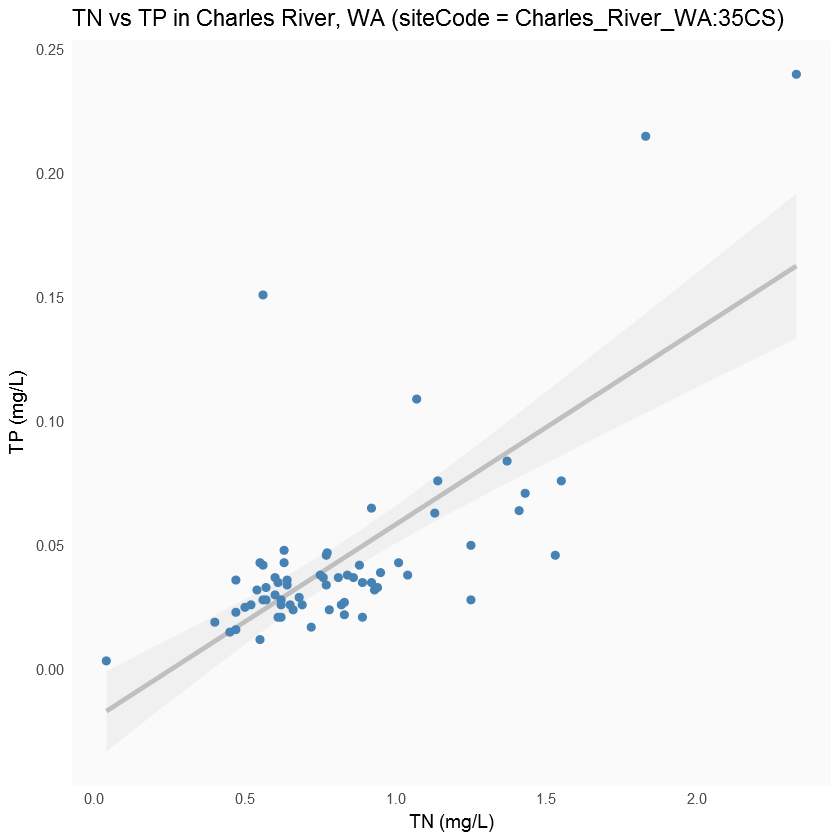

In [65]:
tn <- GetValues(server, siteCode="Charles_River_WA:35CS", variableCode="Charles_River_WA:tn")
tp <- GetValues(server, siteCode="Charles_River_WA:35CS", variableCode="Charles_River_WA:tp")

tpslim <- data.frame(time = tp$time, TP = tp$DataValue)
tnslim <- data.frame(time = tn$time, TN = tn$DataValue)

tntp <- inner_join(tpslim, tnslim, by="time") 

p <- ggplot(tntp, aes(x=TN, y=TP)) +
        geom_smooth(method="lm", colour="grey75", fill="grey90", alpha=0.5) + 
        geom_point(colour="steelblue") +
        xlab("TN (mg/L)") + 
        ylab("TP (mg/L)") +
        ggtitle("TN vs TP in Charles River, WA (siteCode = Charles_River_WA:35CS)") +
        theme_minimal() + 
        theme(panel.background = element_rect(colour=NA, fill="grey98"), panel.grid=element_blank())
p

<a id='section2'></a>
### 2. Querying and downloading EnviroDIY data

Currently, the EnviroDIY data portal is not a registered service within the CUAHSI HIS, however, the `WaterML` R package can be used to access data using a known URL endpoint. The live EnviroDIY CUAHSI WOFpy endpoints can be found [here](http://odm2wofpy.uwrl.usu.edu:8080/odm2timeseries/). This tutorial currently uses the WaterML 1.0 SOAP service. 

The following code demonstrates how to access the live EnviroDIY data. 

In [66]:
server <- "http://odm2wofpy.uwrl.usu.edu:8080/odm2timeseries/soap/cuahsi_1_0/.wsdl"
sites <- GetSites(server)
sites

[1] "downloading sites from: http://odm2wofpy.uwrl.usu.edu:8080/odm2timeseries/soap/cuahsi_1_0/ ..."
[1] "download time: 0.539999999999964 seconds, status: Success"
[1] "reading sites WaterML data..."


SiteID,SiteName,SiteCode,FullSiteCode,Latitude,Longitude,Elevation,State,County,Comments
96,Upper Rocky Run,RockyUp,odm2timeseries:RockyUp,39.81690,-75.55050,NA,NA,NA,NA
124,Pennypack Creek in Pennypack Park,PUPP2S,odm2timeseries:PUPP2S,40.15668,-75.08858,NA,NA,NA,NA
74,Anthony's Desk at LimnoTech in Oakdale MN,Anthonys_Desk,odm2timeseries:Anthonys_Desk,44.95070,-92.95620,NA,NA,NA,NA
121,KINNI_Logger5,KINNI_Logger5,odm2timeseries:KINNI_Logger5,44.85177,-92.63802,NA,NA,NA,NA
92,Lower Beaver Creek,BeaverLow,odm2timeseries:BeaverLow,39.83780,-75.57280,NA,NA,NA,NA
86,JRains1,JRains1,odm2timeseries:JRains1,39.95490,-75.18960,NA,NA,NA,NA
125,Pennypack Creek at Paper Mill Bridge,PUPP3S,odm2timeseries:PUPP3S,40.14020,-75.07501,NA,NA,NA,NA
138,USU Mayfly Test,USU_Mayfly_Test,odm2timeseries:USU_Mayfly_Test,41.73869,-111.85480,NA,NA,NA,NA
103,Cherry Creek Downstream,PKCV2S,odm2timeseries:PKCV2S,40.97320,-75.16950,NA,NA,NA,NA
139,CRO-IT Closet,CRO-IT Closet,odm2timeseries:CRO-IT Closet,44.95074,-92.95615,NA,NA,NA,NA


Use the same code as in section 1 to view the site details of KINNI_Logger4.

In [67]:
siteinfo <- GetSiteInfo(server, "odm2timeseries:KINNI_Logger1")
levels(as.factor(siteinfo$VariableCode))

[1] "downloading SiteInfo from: http://odm2wofpy.uwrl.usu.edu:8080/odm2timeseries/soap/cuahsi_1_0/"
[1] "download time: 0.509999999999764 seconds, status: Success"


[1] "Adafruit_DS18B20_Temp"     "EnviroDIY_Mayfly_FreeSRAM"
[3] "EnviroDIY_Mayfly_Temp"     "EnviroDIY_Mayfly_Volt"    
[5] "MaxBotix_MB7386_Distance"  "Seeed_BME280_humidity"    
[7] "Seeed_BME280_Temp"

<a id='section3'></a>
### 3. Mapping, plotting, and summarizing the data

In this section, you will be guided through some useful examples of how to efficiently summarize the site data using maps and plots. Several additional R packages are used in this section: `tidyverse`, `leafletr`, `ggplot`, and `plotly`.

We will use the EnviroDIY demonstration site at Crosslands Property as an example. Note that there are three crosslands sites available at the EnviroDIY endpoint, but only ***odm2timeseries:160065_Crosslands*** is actively logging. 

Start by exploring the sensors and geographic location of this site:

In [68]:
server <- "http://odm2wofpy.uwrl.usu.edu:8080/odm2timeseries/soap/cuahsi_1_0/.wsdl"

info <- GetSiteInfo(server, "odm2timeseries:160065_Crosslands")
info <- data.frame(info$SiteName, info$Latitude, info$Longitude, info$VariableCode, info$VariableName, info$methodID)
colnames(info) <- c('SiteName', 'Latitude', 'Longitude', 'VariableCode', 'Variable Name', 'methodID')
info 

[1] "downloading SiteInfo from: http://odm2wofpy.uwrl.usu.edu:8080/odm2timeseries/soap/cuahsi_1_0/"
[1] "download time: 0.730000000000018 seconds, status: Success"


SiteName,Latitude,Longitude,VariableCode,Variable Name,methodID
160065 CrosslandsPond - 10 variables,44.95061,-92.95508,Adafruit_AM2315_Temp,Temperature,2
160065 CrosslandsPond - 10 variables,44.95061,-92.95508,Seeed_BME280_Temp,Temperature,2
160065 CrosslandsPond - 10 variables,44.95061,-92.95508,EnviroDIY_Mayfly_Temp,Temperature,2
160065 CrosslandsPond - 10 variables,44.95061,-92.95508,EnviroDIY_Mayfly_FreeSRAM,Free SRAM,2
160065 CrosslandsPond - 10 variables,44.95061,-92.95508,EnviroDIY_Mayfly_Volt,Battery voltage,2
160065 CrosslandsPond - 10 variables,44.95061,-92.95508,Adafruit_DS18B20_Temp,Temperature,2
160065 CrosslandsPond - 10 variables,44.95061,-92.95508,Seeed_BME280_humidity,Relative humidity,2
160065 CrosslandsPond - 10 variables,44.95061,-92.95508,Adafruit_AM2315_humidity,Relative humidity,2
160065 CrosslandsPond - 10 variables,44.95061,-92.95508,Seeed_BME280_Temp,Temperature,2
160065 CrosslandsPond - 10 variables,44.95061,-92.95508,MaxBotix_MB7386_Distance,Distance,2


#### Mapping

Use the `rCharts` package to map the coordinates and view where the site is located. 


In [69]:
library(rCharts)
library(IRdisplay)

lat <- info$Latitude[1]
long <- info$Longitude[1]
sitename <- info$SiteName[1]

m <- Leaflet$new()
m$setView(c(lat,long),16)

m$marker(c(lat, long), bindPopup = paste("<p>", sitename, "</p",sep=" "))

display_chart = function(viz){
  y = paste(capture.output(viz$show('iframesrc', cdn = TRUE)), collapse = "\n")
  IRdisplay::display_html(y)
}

display_chart(m)

<iframe srcdoc=' <!doctype HTML>
<meta charset = 'utf-8'>
<html>
 <head>
 <link rel='stylesheet' href='http://cdn.leafletjs.com/leaflet-0.5.1/leaflet.css'>
 
 <script src='http://cdn.leafletjs.com/leaflet-0.5.1/leaflet.js' type='text/javascript'></script>
 <script src='https://rawgithub.com/leaflet-extras/leaflet-providers/gh-pages/leaflet-providers.js' type='text/javascript'></script>
 <script src='http://harrywood.co.uk/maps/examples/leaflet/leaflet-plugins/layer/vector/KML.js' type='text/javascript'></script>
 
 <style>
 .rChart {
 display: block;
 margin-left: auto; 
 margin-right: auto;
 width: 800px;
 height: 400px;
 } 
 </style>
 
 </head>
 <body >
 
 <div id = 'chart2cc43f34d17' class = 'rChart leaflet'></div> 
 <script>
 var spec = {
 "dom": "chart2cc43f34d17",
"width": 800,
"height": 400,
"urlTemplate": "http://{s}.tile.osm.org/{z}/{x}/{y}.png",
"layerOpts": {
 "attribution": "Map data<a href=\"http://openstreetmap.org\">OpenStreetMap</a>\n contributors, Imagery<a href=\"http://mapbox.com\">MapBox</a>" 
},
"center": [ 44.950608, -92.955084 ],
"zoom": 16,
"id": "chart2cc43f34d17" 
}

 var map = L.map(spec.dom, spec.mapOpts)
 
 map.setView(spec.center, spec.zoom);

 if (spec.provider){
 L.tileLayer.provider(spec.provider).addTo(map) 
 } else {
 L.tileLayer(spec.urlTemplate, spec.layerOpts).addTo(map)
 }
 
 L
 .marker([
 44.951,
-92.955 
])
 .addTo( map )
 .bindPopup("<p> 160065 CrosslandsPond - 10 variables </p")
 
 
 
 
 if (spec.circle2){
 for (var c in spec.circle2){
 var circle = L.circle(c.center, c.radius, c.opts)
 .addTo(map);
 }
 }
 
 
 
 
 
 
 
 
</script>
 
 <script></script> 
 </body>
</html> ' scrolling='no' frameBorder='0' seamless class='rChart leaflet ' id='iframe-chart2cc43f34d17'>

#### Plotting Water Depth

First use the `WaterML` package to aquire depth measurements from the Crosslands sensor, then use the `ggplot2::` and `plotly` packages to plot water depth. 


In [104]:
wdepth <- GetValues(server, siteCode="odm2timeseries:160065_Crosslands", variableCode="odm2timeseries:MaxBotix_MB7386_Distance")
head(wdepth)

[1] "downloading values from: http://odm2wofpy.uwrl.usu.edu:8080/odm2timeseries/soap/cuahsi_1_0/ ..."
[1] "download time: 46.8000000000002 seconds, status: Success"
[1] "reading data values WaterML ..."
[1] "found 23953 data values"
[1] "processing censorCode..."
[1] "processing qualifiers..."
[1] "processing dateTime..."
[1] "processing methodID..."
[1] "processing sourceID..."
[1] "processing qualityControlLevel..."


time,DataValue,UTCOffset,Qualifier,CensorCode,DateTimeUTC,MethodCode,SourceCode,QualityControlLevelCode
2017-04-22T03:02:02,0,0,NA,nc,2017-04-22T03:02:02,2,64,Unknown
2017-04-22T03:04:02,0,0,NA,nc,2017-04-22T03:04:02,2,64,Unknown
2017-04-22T04:25:02,9999,0,NA,nc,2017-04-22T04:25:02,2,64,Unknown
2017-04-22T04:28:02,2749,0,NA,nc,2017-04-22T04:28:02,2,64,Unknown
2017-04-22T04:30:02,2537,0,NA,nc,2017-04-22T04:30:02,2,64,Unknown
2017-04-22T04:32:02,2527,0,NA,nc,2017-04-22T04:32:02,2,64,Unknown


Use the `str` function to look at the data frame and verify data is suitable to use with `ggplot`. 

In [105]:
str(wdepth)

'data.frame':	23953 obs. of  9 variables:
 $ time                   : Factor w/ 23953 levels "2017-04-22T03:02:02",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ DataValue              : num  0 0 9999 2749 2537 ...
 $ UTCOffset              : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Qualifier              : logi  NA NA NA NA NA NA ...
 $ CensorCode             : Factor w/ 1 level "nc": 1 1 1 1 1 1 1 1 1 1 ...
 $ DateTimeUTC            : Factor w/ 23953 levels "2017-04-22T03:02:02",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ MethodCode             : Factor w/ 1 level "2": 1 1 1 1 1 1 1 1 1 1 ...
 $ SourceCode             : Factor w/ 1 level "64": 1 1 1 1 1 1 1 1 1 1 ...
 $ QualityControlLevelCode: Factor w/ 1 level "Unknown": 1 1 1 1 1 1 1 1 1 1 ...
 - attr(*, "download.time")= num 46.8
 - attr(*, "download.status")= chr "Success"
 - attr(*, "parse.status")= chr "OK"
 - attr(*, "parse.time")= num 4.04


Note that the ***time*** field of class *Factor* with 22194 unique values. The EnviroDIY time format is yyyy-mm-ddThh:mm:ss. The 'T' acts as a delimiter between the date and time. Use the `tidyr` and `lubridate` packages to separater and create a new field, ***datetime*** with the class *POSIXct* for better integration with `ggplot`.

In [106]:
tidy <- separate(wdepth, time, into=c("date", "time"), sep="T")
tidy$datetime <- paste(tidy$date, " ", tidy$time,sep="")
tidy$datetime <- as.POSIXct(strptime(tidy$datetime,format="%Y-%m-%d %H:%M:%S"))
tidy$date <- as.POSIXct(strptime(tidy$date, format="%Y-%m-%d"))
wdepth$datetime <- tidy$datetime
wdepth$date <- tidy$date

head(wdepth)
str(wdepth)

time,DataValue,UTCOffset,Qualifier,CensorCode,DateTimeUTC,MethodCode,SourceCode,QualityControlLevelCode,datetime,date
2017-04-22T03:02:02,0,0,NA,nc,2017-04-22T03:02:02,2,64,Unknown,2017-04-22 03:02:02,2017-04-22
2017-04-22T03:04:02,0,0,NA,nc,2017-04-22T03:04:02,2,64,Unknown,2017-04-22 03:04:02,2017-04-22
2017-04-22T04:25:02,9999,0,NA,nc,2017-04-22T04:25:02,2,64,Unknown,2017-04-22 04:25:02,2017-04-22
2017-04-22T04:28:02,2749,0,NA,nc,2017-04-22T04:28:02,2,64,Unknown,2017-04-22 04:28:02,2017-04-22
2017-04-22T04:30:02,2537,0,NA,nc,2017-04-22T04:30:02,2,64,Unknown,2017-04-22 04:30:02,2017-04-22
2017-04-22T04:32:02,2527,0,NA,nc,2017-04-22T04:32:02,2,64,Unknown,2017-04-22 04:32:02,2017-04-22


'data.frame':	23953 obs. of  11 variables:
 $ time                   : Factor w/ 23953 levels "2017-04-22T03:02:02",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ DataValue              : num  0 0 9999 2749 2537 ...
 $ UTCOffset              : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Qualifier              : logi  NA NA NA NA NA NA ...
 $ CensorCode             : Factor w/ 1 level "nc": 1 1 1 1 1 1 1 1 1 1 ...
 $ DateTimeUTC            : Factor w/ 23953 levels "2017-04-22T03:02:02",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ MethodCode             : Factor w/ 1 level "2": 1 1 1 1 1 1 1 1 1 1 ...
 $ SourceCode             : Factor w/ 1 level "64": 1 1 1 1 1 1 1 1 1 1 ...
 $ QualityControlLevelCode: Factor w/ 1 level "Unknown": 1 1 1 1 1 1 1 1 1 1 ...
 $ datetime               : POSIXct, format: "2017-04-22 03:02:02" "2017-04-22 03:04:02" ...
 $ date                   : POSIXct, format: "2017-04-22" "2017-04-22" ...
 - attr(*, "download.time")= num 46.8
 - attr(*, "download.status")= chr "Success"
 - attr(*, "parse.status"

Now that the data values are in a usable format, it is time to review and QA/QC any raw data as necessary. There are several steps to this process:

    1. Removing values equal to 0 mm. "0"'s are sensor errors. 
    2. Removing values equal to 9999 mm. "9999"'s  are values returned by the sensor when no measurment is logged. 
    3. Removing values >4000 mm. 4000 mm is the height of the sensor measured from the sediment, thus values greater than 4000 mm are illogical. 
    4. Applying the appropriate depth offset. Raw measurements are recorded as the distance from the sensor to the surface of the water. Therefore, a formula needs to be applied in order to express that sensor reading as a water depth:
    
                Depth (D) = H - Z 
    
                Where:
                        D = Depth of water
                        H = Height of sensor (measured from sediment to sensor)
                        Z = Distance from sensor to water surface (raw measurement)
   
    

##### 1. Remove values of '0'

In [107]:
wdepth <- wdepth %>% filter(DataValue != 0)

##### 2. Remove values of '9999'

In [108]:
wdepth <- wdepth %>% filter(DataValue != 9999)

##### 3. Remove values > 4000 mm 

In [109]:
wdepth <- wdepth %>% filter(DataValue < 4000) 

##### 4. Calculate Water Depth
The height of this sensor is approximately 4000 mm. 

In [110]:
wdepth$Depth = 4000 - wdepth$DataValue

Use `ggplot2` to plot the high frequency data taken from the EnviroDIY sensors. Use the `Sys.Date` function to limit the plot to the las        theme_minimal() + 
        theme(panel.background = element_rect(colour=NA, fill="grey98"), panel.grid=element_blank())t 7 days. 

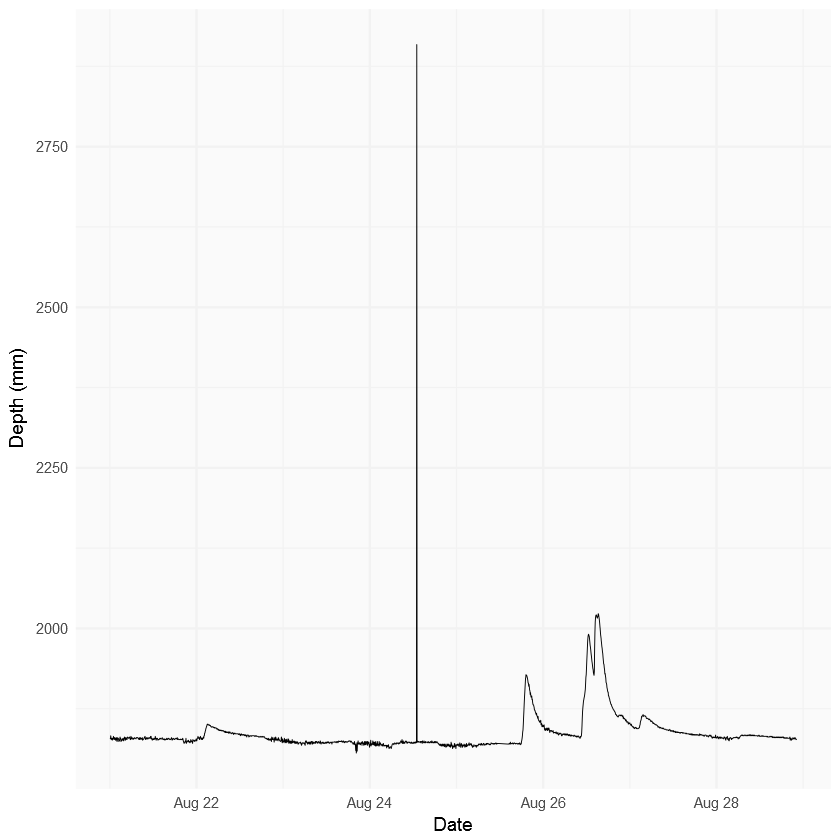

In [111]:
wdepth_last7 <- filter(wdepth, datetime > Sys.Date()-7)

p <- ggplot(wdepth_last7, aes(x=datetime, y=Depth)) + 
        geom_line(size=0.2) +
        xlab("Date") + 
        ylab("Depth (mm)") +
        theme_minimal() + 
        theme(panel.background = element_rect(colour=NA, fill="grey98"), panel.grid.major = element_line(colour="grey95"), panel.grid.minor=element_line(colour="grey95"))
p

Use `ggplot2` to plot the high frequency data taken from the EnviroDIY sensors. Use the `Sys.Date` function to limit the plot to the last days. 

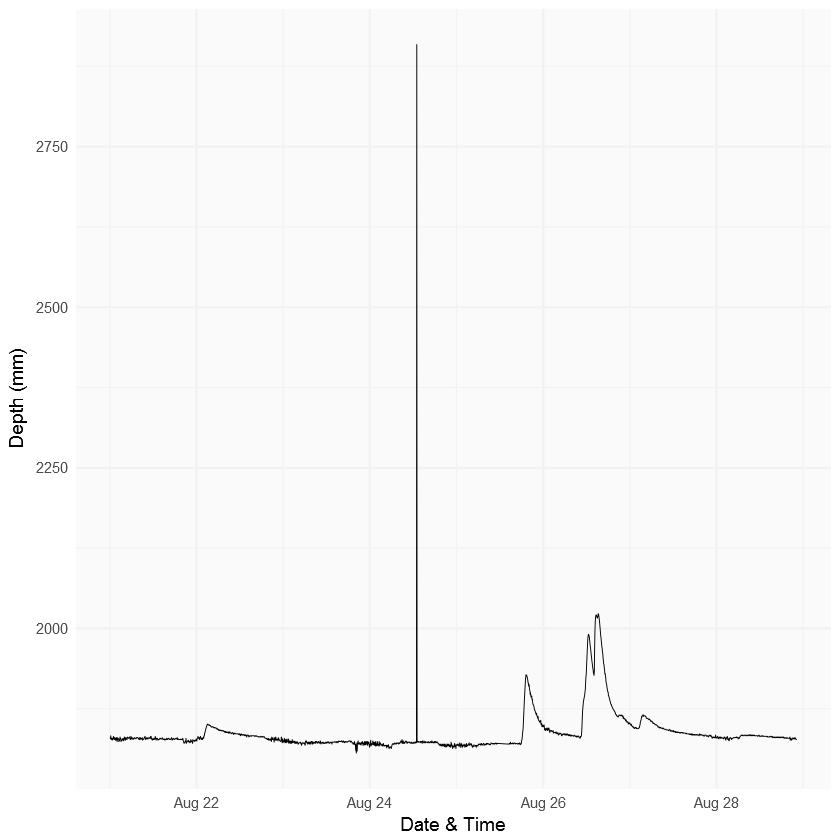

In [112]:
wdepth_last1 <- filter(wdepth, datetime > Sys.Date()-1)

p <- ggplot(wdepth_last7, aes(x=datetime, y=Depth)) + 
        geom_line(size=0.2) +
        xlab("Date & Time") + 
        ylab("Depth (mm)") +
        theme_minimal() + 
        theme(panel.background = element_rect(colour=NA, fill="grey98"), panel.grid.major = element_line(colour="grey95"), panel.grid.minor=element_line(colour="grey95"))
p

Use the `tidyverse` summarise functions to limit the data to a daily maximum. 

In [123]:
wdepth_dmax <- wdepth %>% group_by(date) %>% summarise(maxDepth=max(Depth))
head(wdepth_dmax)

date,maxDepth
2017-04-22,3500
2017-04-23,2743
2017-04-24,2807
2017-04-25,1470
2017-04-26,1654
2017-04-27,1498


Use `ggplot2` to plot the daily maximum depth. Add points to indicate specific daily values. 

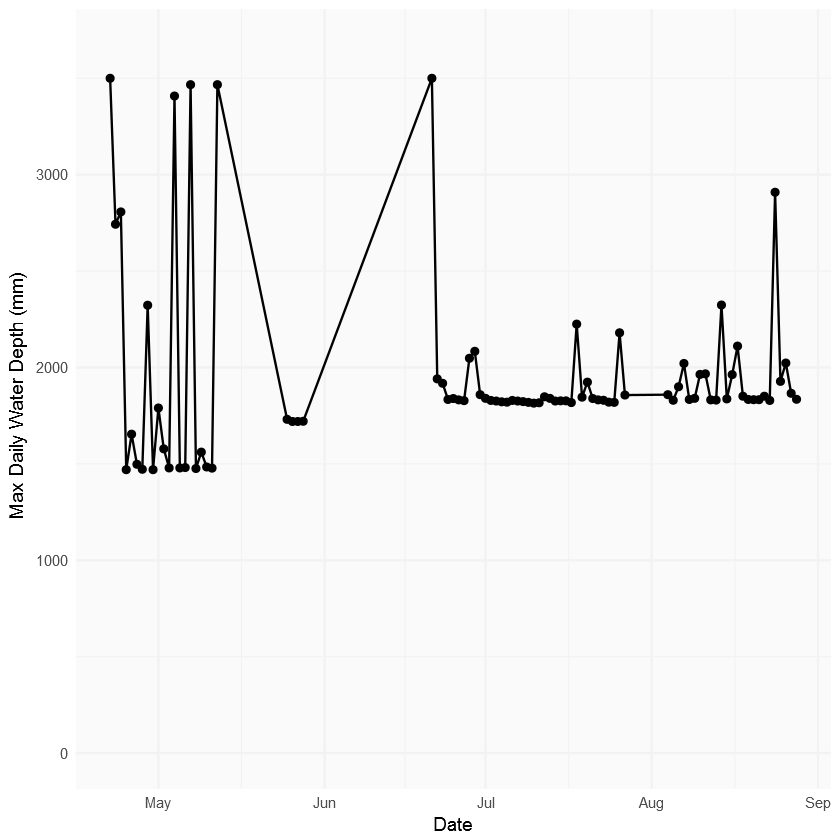

In [124]:
p1 <- ggplot(wdepth_dmax) + 
            geom_path(aes(x=date, y=maxDepth)) +
            geom_point(aes(x=date, y=maxDepth)) +
            ylim(0,max(wdepth_dmax$maxDepth*1.05)) + 
            xlab("Date") +
            ylab("Max Daily Water Depth (mm)") +
            theme_minimal() + 
            theme(panel.background = element_rect(colour=NA, fill="grey98"), panel.grid.major = element_line(colour="grey95"), panel.grid.minor=element_line(colour="grey95"))
p1

Notice that geom_path creates lines over data gaps. This is because time series does not include empty measurements for those missing days, rather it skips over those time points. To emphasize these data gaps, create a full timeseries for the span with NA values for blank days to highlight data gaps. 

In [121]:
mindate <- min(wdepth_dmax$date)
maxdate <- max(wdepth_dmax$date)

range <- data.frame(date=seq.POSIXt(mindate, maxdate, by=86400))
wdepth_dmax <- left_join(range, wdepth_dmax, by="date")



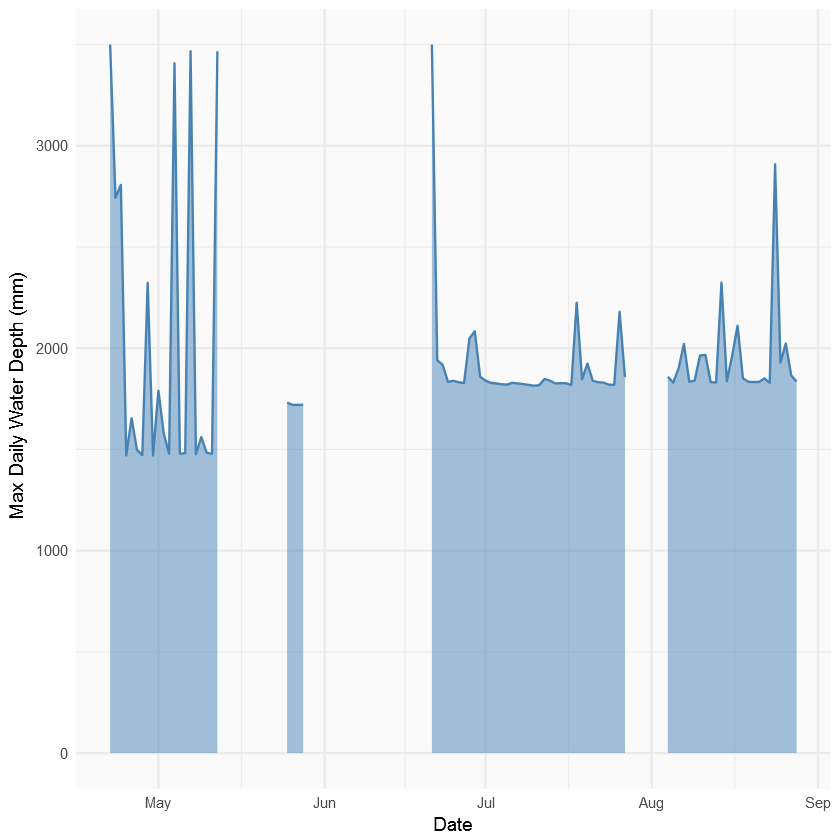

In [122]:
p2 <- ggplot(wdepth_dmax,aes(x=date, y=maxDepth)) + 
            geom_path(colour="steelblue") +
            geom_ribbon(aes(ymin=0, ymax=maxDepth), fill="steelblue", alpha = 0.5) +
            theme_minimal() + 
            theme(panel.background = element_rect(colour=NA, fill="grey98")) + 
            xlab("Date") + 
            ylab("Max Daily Water Depth (mm)")
p2